In [1]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
if os.name=='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"
    sns.set(font=font_family,rc={"axes.unicod_minus":False})

In [2]:
np_data=np.random.randint(1,100,size=3000)
data=list(np_data)

In [3]:
data[0:2]

[52, 3]

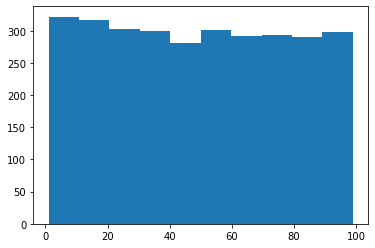

In [4]:
plt.hist(data)
plt.show()

49.239333333333335
28.755406208610967


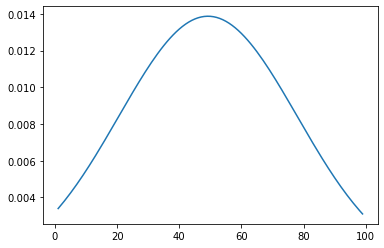

In [5]:
data_mean=np.mean(data)
data_std=np.std(data)
print(data_mean)
print(data_std)
pdf=stats.norm.pdf(np.sort(data),data_mean,data_std)
plt.figure()
plt.plot(np.sort(data),pdf)

-4.381680203853951e-17
1.0


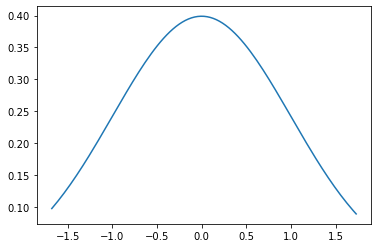

In [6]:
std_list=[]
for i in data:
    z=(i-data_mean)/data_std
    std_list.append(z)
ol_data_mean=np.mean(std_list)
ol_data_std=np.std(std_list)
print(ol_data_mean)
print(ol_data_std)
ol_pdf=stats.norm.pdf(np.sort(std_list), ol_data_mean, ol_data_std)
plt.figure()
plt.plot(np.sort(std_list),ol_pdf)

49.38671096345515
28.985916321486062


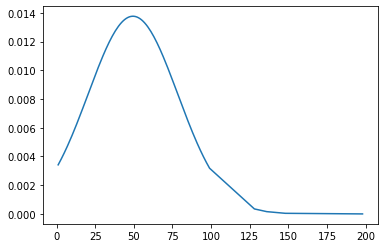

In [7]:
ol_data=data.copy()
ol_no=10
for i in range(ol_no):
    rand_no=random.randint(0,len(data))
    ol_data.insert(rand_no,ol_data[rand_no]*2)
ol_data_mean=np.mean(ol_data)
ol_data_std=np.std(ol_data)
print(ol_data_mean)
print(ol_data_std)
ol_pdf=stats.norm.pdf(np.sort(ol_data),ol_data_mean,ol_data_std)
plt.figure()
plt.plot(np.sort(ol_data),ol_pdf)

-5.665457029316413e-17
1.0


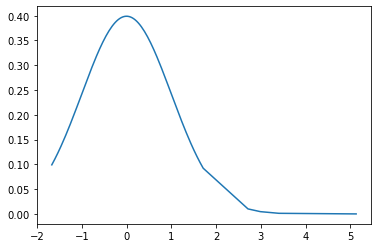

In [8]:
ol_std_list=[]
for i in ol_data:
    z=(i-ol_data_mean)/ol_data_std
    ol_std_list.append(z)
ol_st_data_mean=np.mean(ol_std_list)
ol_st_data_std=np.std(ol_std_list)
print(ol_st_data_mean)
print(ol_st_data_std)
ol_std_pdf=stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean,ol_st_data_std)
plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [9]:
len(ol_std_list)

3010

In [10]:
for i in ol_std_list:
    z=i
    if z>2:
        ol_std_list.remove(z)
    if z<-2:
        ol_std_list.remove(z)

In [11]:
len(ol_std_list)

3006

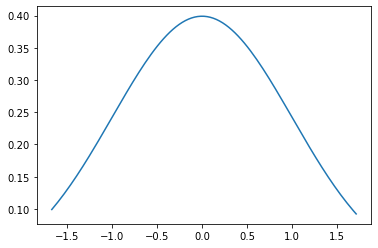

In [12]:
ol_std_pdf=stats.norm.pdf(np.sort(ol_std_list),ol_st_data_mean,ol_st_data_std)
plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [13]:
boxdata=pd.DataFrame(np.random.randn(100,3),columns=["A열","B열","C열"])

In [14]:
boxdata.head()

,A열,B열,C열
0,-0.077496,-1.223789,0.725366
1,-1.612445,-0.219404,-2.018155
2,-1.160681,0.301259,-1.954376
3,-0.787832,0.685958,0.538561
4,0.835684,1.095962,-1.939127


In [15]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.077535,0.001443,-0.141529
std,1.065768,0.834662,0.971907
min,-2.833877,-2.222800,-2.754629
25%,-0.704396,-0.449164,-0.719243
50%,-0.089665,0.030540,-0.058634
75%,0.699674,0.594090,0.447892
max,2.644185,1.733514,2.020319


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


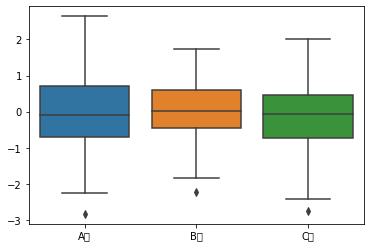

In [16]:
sns.boxplot(data=boxdata)
plt.show()

In [17]:
def get_outlier(df=None,column=None, weight=1.5):
    quantile_25=np.percentile(df[column].values,25)
    quantile_75=np.percentile(df[column].values,75)
    IQR=quantile_75-quantile_25
    IQR_weight=IQR*weight
    lowest=quantile_25-IQR_weight
    highest=quantile_75+IQR_weight
    outlier_idx=df[column][(df[column]<lowest)|(df[column]>highest)].index
    return outlier_idx

In [18]:
outlier_idx=get_outlier(df=boxdata,column='B열',weight=1.5)

In [19]:
outlier_idx

Int64Index([30], dtype='int64')

In [20]:
boxdata.drop(outlier_idx,axis=0,inplace=True)

In [21]:
boxdata.shape

(99, 3)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


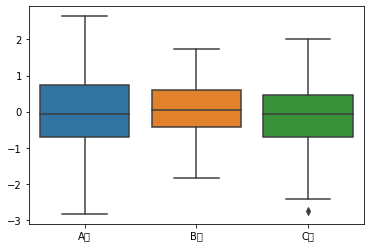

In [22]:
sns.boxplot(data=boxdata)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


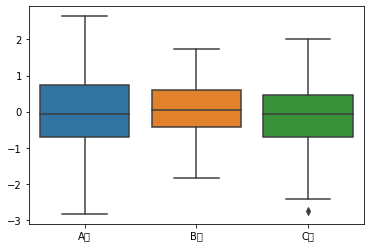

In [23]:
outlier_idx=get_outlier(df=boxdata,column='A열',weight=1.5)
outlier_idx
boxdata.drop(outlier_idx,axis=0,inplace=True)
boxdata.shape
sns.boxplot(data=boxdata)
plt.show()

In [24]:
boxdata.shape

(99, 3)